Лабораторная работа №1 (Другое задание) 
Чистов Владимир 381806-2

In [197]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import imageio
from random import random

Загружаем изображения

(299, 199, 3)


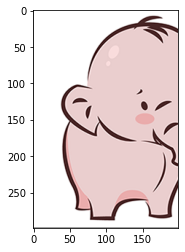

In [198]:
image1 = cv2.imread('D:\ph4.png')
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
print(image1.shape)

(300, 188, 3)


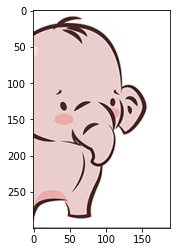

In [199]:
image2 = cv2.imread('D:\ph5.png')
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
print(image2.shape)

Ищем угловые точки на изображениях

In [200]:
cornerImg1 = image1
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,5,3,0.04)
ret, dst = cv2.threshold(dst,0.1*dst.max(),255,0)
dst = np.uint8(dst)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners1 = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)  
image1[dst>0.1*dst.max()]=[0,0,255]

In [201]:
cornerImg2 = image2
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,5,3,0.04)
ret, dst = cv2.threshold(dst,0.1*dst.max(),255,0)
dst = np.uint8(dst)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners2 = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
image2[dst>0.1*dst.max()]=[0,0,255]

arr1 = np.array(corners1).astype(int)
arr2 = np.array(corners2).astype(int)

Выводим координаты найденных точек и отображаем их на изображениях

[[ 98 148]
 [177  10]
 [141  19]
 [154  25]
 [180  26]
 [183  27]
 [185  35]
 [178  45]
 [149 109]
 [ 72 124]
 [ 53 128]
 [150 124]
 [190 124]
 [ 79 130]
 [153 137]
 [166 138]
 [ 74 148]
 [ 52 148]
 [ 91 150]
 [ 86 172]
 [164 162]
 [179 169]
 [166 179]
 [173 182]
 [190 190]
 [190 190]
 [189 208]
 [153 260]
 [ 58 272]
 [ 79 271]
 [183 278]
 [158 281]
 [ 78 286]
 [106 281]
 [190 282]
 [111 287]
 [  0 297]]


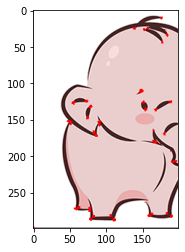

In [202]:
print(arr1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))

[[ 93 149]
 [ 66  11]
 [ 30  20]
 [ 46  25]
 [ 37  23]
 [ 74  36]
 [ 67  46]
 [120 107]
 [ 38 110]
 [110 110]
 [108 122]
 [128 121]
 [ 39 125]
 [ 79 125]
 [ 89 125]
 [108 131]
 [142 130]
 [129 130]
 [ 42 138]
 [ 55 139]
 [133 143]
 [ 90 156]
 [114 161]
 [124 170]
 [ 53 163]
 [ 69 169]
 [ 55 180]
 [ 61 183]
 [ 78 209]
 [ 94 212]
 [ 47 282]
 [ 72 279]
 [ 79 283]
 [  0 288]]


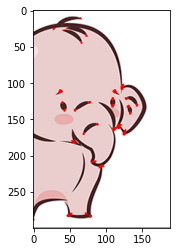

In [203]:
print(arr2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

Делаем рамки справа и снизу изображения, чтобы для любой точки можно была область 8х8 справа и снизу от этой точки

In [204]:
image12 = cv2.imread('D:\ph4.png')
image22 = cv2.imread('D:\ph5.png')

img1Bord = cv2.copyMakeBorder(
    image12,
    top=0,
    bottom=8,
    left=0,
    right=8,
    borderType=cv2.BORDER_CONSTANT,
    value=[255, 255, 255]
)

img2Bord = cv2.copyMakeBorder(
    image22,
    top=0,
    bottom=8,
    left=0,
    right=8,
    borderType=cv2.BORDER_CONSTANT,
    value=[255, 255, 255]
)

Найдем HOG Описания для каждой угловой точки каждого изображения

In [205]:
winSize = (8,8)
blockSize = (2,2)
blockStride = (2,2)
cellSize = (2,2)
nbins = 9

hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins)

winStride1=(8, 8)
padding1=(8, 8)
print("\n hogRes1 \n ")

hogRes1 = np.zeros((arr1.shape[0], 1296, 1), 'float')
for i in range (0, len(arr1)):
    y1 = arr1[i][1]
    x1 = arr1[i][0]
    img_crop1 = img1Bord[y1:y1+8, x1:x1+8]
    hogRes1[i] = hog.compute(img_crop1, winStride1, padding1)
    print(hogRes1[i])




 hogRes1 
 
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.65945667]]
[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.21045816]]
[[0.31425387]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.01729301]]
[[0.49322188]
 [0.        ]
 [0.        ]
 ...
 [0.85509866]
 [0.17871797]
 [0.02197378]]
[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.66842002]
 [0.66842002]
 [0.12894206]]
[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.39747989]]
[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.47739369]]
[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.64346075]
 [0.64346075]]
[[0.57568842]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.26903704]]
[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.19656047]]
[[0.53041118]
 [0.        ]
 [0.        ]
 ..

In [206]:
print("\n hogRes2 \n ")
winStride1=(8, 8)
padding1=(8, 8)    

hogRes2 = np.zeros((arr2.shape[0], 1296, 1), 'float')
for i in range (0, len(arr2)):
    y2 = arr2[i][1]
    x2 = arr2[i][0]
    img_crop2 = img2Bord[y2:y2+8, x2:x2+8]
    hogRes2[i] = hog.compute(img_crop2, winStride2, padding2)
    print(hogRes2[i])


 hogRes2 
 
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.65945667]]
[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.21045816]]
[[0.62869889]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.5346458 ]
 [0.5346458 ]]
[[0.37993202]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.04405269]]
[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.39747989]]
[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.47739369]]
[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.48210976]
 [0.48210976]
 [0.48210976]]
[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.64346075]
 [0.64346075]]
[[0.06147401]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.2588082 ]]
[[0.64476621]
 [0.        ]
 [0.27159452]
 ...
 [0.        ]
 [0.        ]
 [0.04399902]]
[[0.16304542]
 [0.        ]
 [0.        ]
 ..

Найдем пары для угловых точек по HOG Описанию

In [207]:
counter = 0;
for i in range (0, len(arr1)):
    for j in range (0, len(arr2)):
        if (np.array_equal(hogRes1[i], hogRes2[j])):
            counter += 1
            print("pair №", counter)
            print(arr1[i], arr2[j])
            print("\n")

pair № 1
[177  10] [66 11]


pair № 2
[141  19] [30 20]


pair № 3
[185  35] [74 36]


pair № 4
[178  45] [67 46]


pair № 5
[149 109] [ 38 110]


pair № 6
[150 124] [ 39 125]


pair № 7
[190 124] [ 79 125]


pair № 8
[153 137] [ 42 138]


pair № 9
[166 138] [ 55 139]


pair № 10
[164 162] [ 53 163]


pair № 11
[166 179] [ 55 180]


pair № 12
[189 208] [ 78 209]


pair № 13
[183 278] [ 72 279]


pair № 14
[158 281] [ 47 282]


pair № 15
[190 282] [ 79 283]


pair № 16
[111 287] [  0 288]


